# Part I/Option 1/
       1. Find most correlated pair of menu items for each venue. 
       2. Evaluate statistical significance of the correlation. 
       3. Can you tell if which item drives sales of the other? Propose an approach to causality analysis.
       4. Calculate causality metric for the found item pair. Evaluate statistical significance of the metric.

## Structure of the json file (without waiters part)

```json
{
    "type" : "object", 
    "properties": { 
    "venue_id" : {
        "type" : "string",
        "description" : "venue_id"
    },
    "ckecks": {
        "type" : "array",
        "items" : {
            "type" : "object",
            "properties" : {
                "provider_id" : {
                    "type" : "string",
                    "description" : "Time point" 
                     }, 
                "date" : {
                    "type" : "date",
                    "description" : "Date" 
                     }, 
                "covers" : {
                    "type" : "integer",
                    "description" : "Covers" 
                     },  
                "server" : {
                    "type" : "string",
                    "description" : "Server name" 
                     },   
                "check_number" : {
                    "type" : "integer",
                    "description" : "check number" 
                     },                        
                "total_paid_amount" : {
                    "type" : "number",
                    "description" : "total paid" 
                     },                        
                "subtotal" : {
                    "type" : "number",
                    "description" : "total - tax" 
                     }, 
                "tax" : {
                    "type" : "number",
                    "description" : "Tax" 
                     },  
                "tip" : {
                    "type" : "number",
                    "description" : "Tip" 
                     },   
                "service_charges" : {
                    "type" : "number",
                    "description" : "Service charges" 
                     },                        
                "discounts" : {
                    "type" : "number",
                    "description" : "Discounts" 
                     },                                    
                 "items" : {
                     "type" : "array",
                     "items" : {
                         "type" : "object",
                         "properties" : {
                             "name" : {
                             "type" : "string",
                             "description" : "Item name" 
                             }, 
                             "price" : {
                             "type" : "number",
                             "description" : "Price" 
                             }, 
                             "date" : {
                             "type" : "date",
                             "description" : "Date" 
                             }, 
                             "check_provider_id" : {
                             "type" : "string",
                             "description" : "Check provider id" 
                             }, 
                             "check_covers" : {
                             "type" : "integer",
                             "description" : "Check covers" 
                             }, 
                             "check_subtotal" : {
                             "type" : "number",
                             "description" : "check_subtotal" 
                             },    
                             "categories" : {
                                 "type" : "array",
                                 "items" : {
                                     "type" : "object", 
                                     "properties" : {
                                         "Categor 1" : {
                                             "type" : "string", 
                                             "description" : "Sections of menu"
                                          },
                                          "Categor 2" : {
                                             "type" : "string", 
                                             "description" : "Sections of menu"
                                           },
                                           "Categor 3" : {
                                             "type" : "string", 
                                             "description" : "Sections of menu"      
                                           }    
                                     }
                                 }    
                              },      
                             
                     }
                 },
                 "payments" : {
                     "type" : "array", 
                     "items" : {
                         "type" : "object",
                         "properties" : {
                             "type" : "object",
                             "properties" : {
                                 "method" : {
                                     "type" : "object",
                                     "properties" : {
                                         "type" : "string",
                                         "description" : "Type of payment"                                     
                                         },
                                         "provider" : {
                                             "type" : "string",
                                             "description" : "Provider"
                                         },
                                         "provider_id" : {
                                             "type" : "string",
                                             "description" : "Provider ID"
                                         }
                                 }
                             }
                         },
                         "tip" : {
                             "type" : "number",
                             "description" : "Tip"
                         },
                         "amount" : {
                             "type" : "number",
                             "description" : "Amount"
                         }
                     }
                 },
                 "tables" : {
                     "type" : "array"
                 },
                 "revenue_center" : {
                     "type" : "string",
                     "description" : "Revenue Center"
                 },
                 "db_id" : {
                     "type" : "object",
                     "properties" : {
                         "oid" : {
                             "type" : "string",
                             "description" : "DB id"
                         }
                     }
                 }
      
        }
        
     }
}           

```

In [4]:
%matplotlib inline  

import json
import pandas as pd
import ijson
import numpy as np
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt

## Read data with venue_id = 71dfe770d93c44c8ae63d47f7c24cea5 and transform it to convenient form

#### Download data into pandas dataframe

In [8]:
df = pd.read_csv('Initial_data/65f11d4b-6514-45ac-9908-f787f8bba0ed.csv', low_memory=False)
df.ix[:5, :20]

,provider_id,date/$date,covers,server,check_number,total_paid_amount,subtotal,tax,tip,service_charges,discounts,items/0/name,items/0/price,items/0/date/$date,items/0/check_provider_id,items/0/check_covers,items/0/check_subtotal,items/0/categories/0,items/0/categories/1,items/0/categories/2
0,105927,1511310912000,7,Elizabeth Parrish,4261,288.41,264.90,23.51,0.00,0.0,0.0,Salad c82c0b,0.00,1.511311e+12,105927.0,7.0,264.90,Course 1,Soup/Salad,Food
1,105928,1511311144000,3,Laura Strickland DDS,6745,119.60,109.85,9.75,23.74,0.0,0.0,c87f2 55063,13.00,1.511311e+12,105928.0,3.0,109.85,Cocktails,liquor,Liquor
2,105929,1511311840000,3,Laura Strickland DDS,5483,73.98,67.95,6.03,0.00,0.0,0.0,Salad c82c0b,0.00,1.511312e+12,105929.0,3.0,67.95,Course 1,Soup/Salad,Food
3,105926,1511308536000,2,Lauren Garrett,5482,99.07,91.00,8.07,20.00,0.0,0.0,bb88e781fbc71d8,29.00,1.511309e+12,105926.0,2.0,91.00,bottle red wine,$29 List,Wine
4,105884,1511301009000,0,Heather King,1314,0.00,0.00,0.00,0.00,0.0,0.0,5f32af7 3918ab9,0.00,1.511301e+12,105884.0,0.0,0.00,Entrees,Entrees,Food
5,105930,1511313336000,0,Heather King,1316,0.01,0.01,0.00,50.00,0.0,0.0,ed07 3889,0.01,1.511313e+12,105930.0,0.0,0.01,open items,open wine,Wine


#### Size of the dataframe

In [9]:
print (df.shape)

(24408, 994)


#### Save only necessary columns for future analyze

In [10]:
cols = [col for col in df.columns if ((col=='provider_id') | ('name' in col))]
df = df[cols]

df.ix[:5, :20]

,provider_id,items/0/name,items/1/name,items/2/name,items/3/name,items/4/name,items/5/name,items/6/name,items/7/name,items/8/name,items/9/name,items/10/name,items/11/name,items/12/name,items/13/name,items/14/name,items/15/name,items/16/name,items/17/name,items/18/name
0,105927,Salad c82c0b,Salad c82c0b,Salad c82c0b,Salad c82c0b,Salad c82c0b,Salad c82c0b,Pasta 9dc82983,Pasta 9dc82983,d12cf7ce 4e5d0,d12cf7ce 4e5d0,d12cf7ce 4e5d0,f5d3 6bf7,Pasta fa919,Pasta fa919,8da997 89719,8da997 89719,8da997 89719,Pasta 628046,Pasta 628046
1,105928,c87f2 55063,1b d9ceb189,1b d9ceb189,26d07abf5 4baee,26d07abf5 4baee,26d07abf5 4baee,Pasta 9dc82983,Pasta 9dc82983,Pasta 9dc82983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,105929,Salad c82c0b,Salad c82c0b,77d3f 8253e4,Pasta 9dc82983,1c8ae18b 114 89a,Coke 0f81,8da997 89719,8da997 89719,8da997 89719,Coke 0f81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,105926,bb88e781fbc71d8,416a455,Salad c82c0b,Salad c82c0b,c9c25e4aa1 77d3f,c9c25e4aa1 77d3f,8da997 89719,8da997 89719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105884,5f32af7 3918ab9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,105930,ed07 3889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Compute the correlation matrix

#### Select unique items from menu

In [11]:
%%time
array_items = []
for i in range(len(df.index)):
    array_items.extend(pd.unique(df.drop(['provider_id'], axis = 1).iloc[i]))
    

CPU times: user 8min 12s, sys: 2min 47s, total: 10min 59s
Wall time: 11min 3s


In [13]:
names = list(set(array_items))
names = [x for x in names if str(x) != 'nan']

In [18]:
names[0:10]

['18a33584467170e7',
 '3927',
 '8a1cf9eb72d8430',
 '67c31b1e8',
 'effcfcf7 5183',
 'dbcd07',
 'Beefeater ',
 'd58e2 4b0da',
 'cc5d4',
 '1b d8b7cb 22 421']

#### Create correlation matrix

In [20]:
Results = pd.DataFrame(columns=names)
Results['provider_id'] = df['provider_id']
Results = Results.fillna(0)
Results.shape

(24408, 638)

In [21]:
Results.ix[:5, :20]

,18a33584467170e7,3927,8a1cf9eb72d8430,67c31b1e8,effcfcf7 5183,dbcd07,Beefeater,d58e2 4b0da,cc5d4,1b d8b7cb 22 421,26d07abf5 4baee,Scallop e209d,2462804 bf2e73,Cappucino,d1d8 730f50,ab1f8d d142d3dd,d58e2 614a17 ecf,Pasta fa919,2600bb5fc5da,fa919 2154c94cfc
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Fill the matrix - for each 'provider_id' paste count of items

In [22]:
%%time
for i in range(len(df.index)):
    for j in range(1,len(df.iloc[0])):
        tmp_name = df.iloc[i][j]
        if (pd.isnull(df.iloc[i][j]) == False):
            Results.at[i, tmp_name] = Results.at[i, tmp_name] + int(1)

CPU times: user 16min 43s, sys: 12.5 s, total: 16min 56s
Wall time: 16min 53s


#### Check for several items for provider_id = 105927

In [33]:
print("Provider_id: " +  str(Results.at[0, 'provider_id']))

print("Counts of 'Salad c82c0b': " +  str(Results.at[0, 'Salad c82c0b']))
print("Counts of 'Pasta 9dc82983': " +  str(Results.at[0, 'Pasta 9dc82983']))
print("Counts of 'f5d3 6bf7': " +  str(Results.at[0, 'f5d3 6bf7']))
print("Counts of 'f5d3 6bf7': " +  str(Results.at[0, 'f5d3 6bf7']))

Provider_id: 105927
Counts of 'Salad c82c0b': 6
Counts of 'Pasta 9dc82983': 2
Counts of 'f5d3 6bf7': 1
Counts of 'f5d3 6bf7': 1


In [34]:
#Save Results
Results.to_csv('Results/65f11d4b-6514-45ac-9908-f787f8bba0ed/Results.csv')

#### Calculate correlations

In [36]:
%%time
corr_matrix = Results.drop(['provider_id'], axis=1).corr()

CPU times: user 13.9 s, sys: 64.3 ms, total: 13.9 s
Wall time: 13.9 s


In [49]:
corr_matrix.ix[:5, :20]

,18a33584467170e7,3927,8a1cf9eb72d8430,67c31b1e8,effcfcf7 5183,dbcd07,Beefeater,d58e2 4b0da,cc5d4,1b d8b7cb 22 421,26d07abf5 4baee,Scallop e209d,2462804 bf2e73,Cappucino,d1d8 730f50,ab1f8d d142d3dd,d58e2 614a17 ecf,Pasta fa919,2600bb5fc5da,fa919 2154c94cfc
18a33584467170e7,1.000000,-0.000125,-0.000041,-0.000206,-0.000310,-0.000174,-0.000271,-0.001389,-0.000894,-0.000092,-0.002953,-0.000307,-0.000153,-0.001715,-0.000150,-0.000422,-0.001282,-0.001126,-0.000058,-0.000085
3927,-0.000125,1.000000,-0.000125,-0.000629,-0.000947,-0.000530,-0.000827,0.002838,-0.002728,-0.000280,-0.004387,-0.000937,-0.000466,-0.005234,-0.000457,-0.001288,0.009567,0.002006,-0.000177,-0.000261
8a1cf9eb72d8430,-0.000041,-0.000125,1.000000,-0.000206,-0.000310,-0.000174,-0.000271,-0.001389,-0.000894,-0.000092,-0.002953,-0.000307,-0.000153,-0.001715,-0.000150,-0.000422,-0.001282,-0.001126,-0.000058,-0.000085
67c31b1e8,-0.000206,-0.000629,-0.000206,1.000000,-0.001561,-0.000874,-0.001364,0.001429,0.004164,-0.000461,0.005078,-0.001546,0.023841,0.015178,0.027984,0.229437,0.015601,0.012139,-0.000292,-0.000430
effcfcf7 5183,-0.000310,-0.000947,-0.000310,-0.001561,1.000000,0.006615,-0.002051,0.014676,0.000432,-0.000694,0.000274,0.018948,0.023387,0.022634,-0.001134,0.003402,0.026284,0.012462,-0.000439,-0.000647


#### Plot correlaion matrix

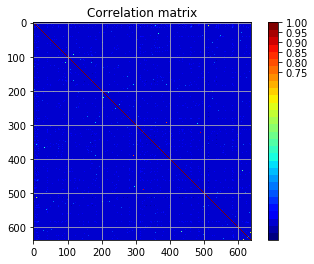

In [54]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation matrix')
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(Results.drop(['provider_id'], axis=1))

## Find most correlated pair of menu items

In [38]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=len(names)):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [39]:
%%time
top_corr = get_top_abs_correlations(Results, 20)

CPU times: user 16.6 s, sys: 187 ms, total: 16.8 s
Wall time: 16.8 s


In [45]:
print("Top correlated pair:")
print(top_corr)

Top correlated pair:
c301fcef8afa743e   dd12fd1295e031f     1.000000
0b 6a3040          0b b2f35a172a       1.000000
28441ca11390a9e    938265563418696     1.000000
0b b2f35a172a      0b 9a098fc13        0.995788
0b 6a3040          0b 9a098fc13        0.995788
0b f2002b44        0b b2f35a172a       0.991699
0b 6a3040          0b f2002b44         0.991699
0b f2002b44        0b 9a098fc13        0.987522
d82dee0c07b021ed   dc753f43db9bfeaa    0.898027
35ac5f053f6333b    Juice 8289a9        0.894424
81e2c0c21f2        205ad788d3c3f8c9    0.870378
bc2706f74a29d      0e537e4ff83         0.816491
2154c94cfc         2154c94cfc 7d4c5    0.806395
Pasta 5            2154c94cfc          0.801615
953 b8 b97 c1624   2526c def           0.800053
Chardonnay 807f89  beb00ee83ad8bc7e    0.754645
f8a53304b05c195    f15d142 47dec5      0.707092
6ef53c2424497      c4d3706ae7a4fb5     0.707092
2b24d55bf742bc6    c4d3706ae7a4fb5     0.707092
Pasta 5            2154c94cfc 7d4c5    0.702854
dtype: float64


## Statistical significance

#### Calculate p-value matrix

In [46]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [47]:
%%time
pv_matrix = calculate_pvalues(Results)

CPU times: user 3min 23s, sys: 1.95 s, total: 3min 25s
Wall time: 3min 27s


In [48]:
pv_matrix.ix[:5, :20]

,18a33584467170e7,3927,8a1cf9eb72d8430,67c31b1e8,effcfcf7 5183,dbcd07,Beefeater,d58e2 4b0da,cc5d4,1b d8b7cb 22 421,26d07abf5 4baee,Scallop e209d,2462804 bf2e73,Cappucino,d1d8 730f50,ab1f8d d142d3dd,d58e2 614a17 ecf,Pasta fa919,2600bb5fc5da,fa919 2154c94cfc
18a33584467170e7,0,0.9844,0.9949,0.9743,0.9613,0.9784,0.9662,0.8282,0.8889,0.9886,0.6446,0.9617,0.981,0.7887,0.9813,0.9474,0.8412,0.8604,0.9928,0.9893
3927,0.9844,0,0.9844,0.9217,0.8824,0.934,0.8972,0.6575,0.67,0.9652,0.4931,0.8836,0.942,0.4135,0.9431,0.8405,0.135,0.754,0.978,0.9675
8a1cf9eb72d8430,0.9949,0.9844,0,0.9743,0.9613,0.9784,0.9662,0.8282,0.8889,0.9886,0.6446,0.9617,0.981,0.7887,0.9813,0.9474,0.8412,0.8604,0.9928,0.9893
67c31b1e8,0.9743,0.9217,0.9743,0,0.8073,0.8913,0.8313,0.8234,0.5153,0.9426,0.4276,0.8091,0.0002,0.0177,0,0,0.0148,0.0579,0.9637,0.9464
effcfcf7 5183,0.9613,0.8824,0.9613,0.8073,0,0.3014,0.7486,0.0219,0.9462,0.9137,0.9658,0.0031,0.0003,0.0004,0.8594,0.5951,0,0.0515,0.9454,0.9195


## P-value and correlations

I am little bit confused to saw in this task calculation both correlation and significance. 
Link to [wikipedia](https://en.wikipedia.org/wiki/Multiple_comparisons_problem).


#### Some example of strong correlation coefficient with a high p value

[Link](https://stats.stackexchange.com/questions/17371/example-of-strong-correlation-coefficient-with-a-high-p-value/17386)
<img src="Corr_problem.png">